# K-Nearest Neighbors Classifier

K Nearest Neighbors (KNN) is one of the simplest algorithms to understand and implement but despite its simplicity, it's still one of the best starting models for both regression and classification.

Unlike most other models for classification and regression, KNN falls under the category of lazy learning algorithms, which means that there is no explicit training phase before inference. Instead, the generalization to the training data is delayed until a prediction is made.

Whilst this means that once you have your data the algorithm can immediately be used for inference, there is an inherent problem with this type of algorithm. In order for the algorithm to work we need to store the whole training set in memory. For this reason, KNN is mostly applied on small datasets.

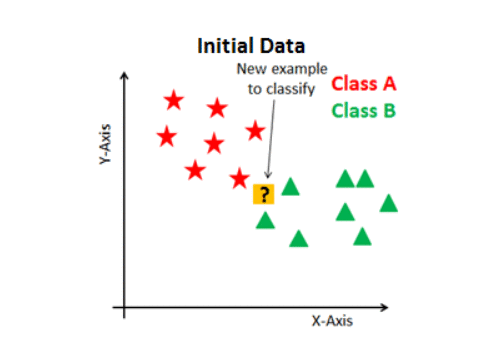

In [4]:
from IPython.display import Image 
pil_img = Image(filename='knn.gif.png')
display(pil_img)

## KNN Theory
To run KNN the following steps are needed:

1. Compute the distance between the item of interest and every item in the training-set.
2. Pick the k closest data points
3. Use the k closest points to make a prediction. For classification, a majority vote is used, which means that the class that occurs most often is used as the prediction. For regression, the average of the y values of the k points is used as the prediction

## Choosing the right value for K
When working with KNN there are two important hyperparameters – The k-value and the distance metric.

The optimal K-value will vary depending on your data-set. It should be big enough that noise won't affect the prediction but it should also be low enough that one class won't dominate another only because it's sheer amount of data-points.

There are many different ways the k-value can be determined.

1. An arbitrary value can be chosen (not perfect but often good enough). The square root of n is a popular pick (n...Number of data-points in the training-set).
2. The best value can also be estimated by running the model with lots of different K values and choosing the best one.

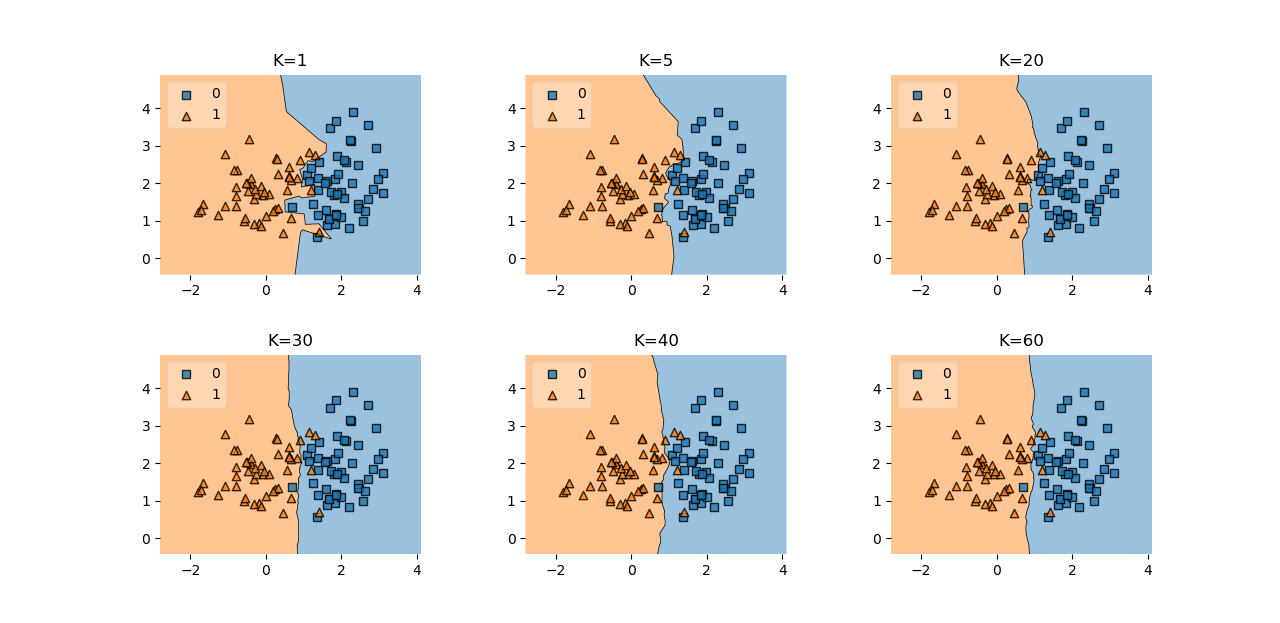

In [1]:
from IPython.display import Image 
pil_img = Image(filename='1.png')
display(pil_img)

## Distance Metrics
There are many different ways to compute the distance between two points, and the proper metric to use will be different depending on the data-set. Nonetheless, there are a few metrics that can be used for most data-sets.

### Euclidean Distance
Euclidean Distance is probably the one you're most familiar with. It describes what most of us think of when thinking about the distance between two points. It essentially is the straight-line distance between two points.

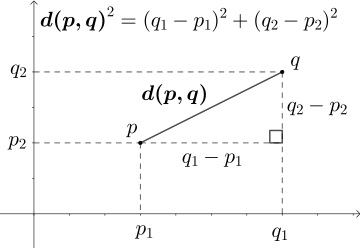

In [2]:
pil_img = Image(filename='2.png')
display(pil_img)

Above you can see the formula for two points in two dimensional space. Generally, the mathematical formula looks as follows:


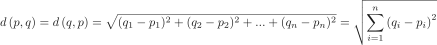

In [3]:
pil_img = Image(filename='1-1.png')
display(pil_img)

### Cosine Similarity
Another common metric is Cosine similarity. Rather than calculating a magnitude, Cosine similiarity calculates the cosine of the angle between the two featurevectors. If two vectors have a small angle between them the output will be close to 1 (very similar). On the other hand if the angles are far apart (near 180°) the similarity score will approach 0.

This metric is often used for data-sets where the similarity between the directions of two data-points is more important than the magnitude.

In general, choosing a distance/similarity metric is often tricky, and therefore it might be best to just try multiple and see which one works best for a specific problem.

In [ ]:
pil_img = Image(filename='3.png')
display(pil_img)

![](d.png)

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from IPython.core.display import display, HTML

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Exploring data

In [7]:
df = pd.read_csv("../nasa.csv")

In [8]:
pd.set_option("display.max_columns", None)

In [9]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [10]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [11]:
df.drop([df.columns[0], df.columns[1]], axis=1, inplace=True)

# Categorical values

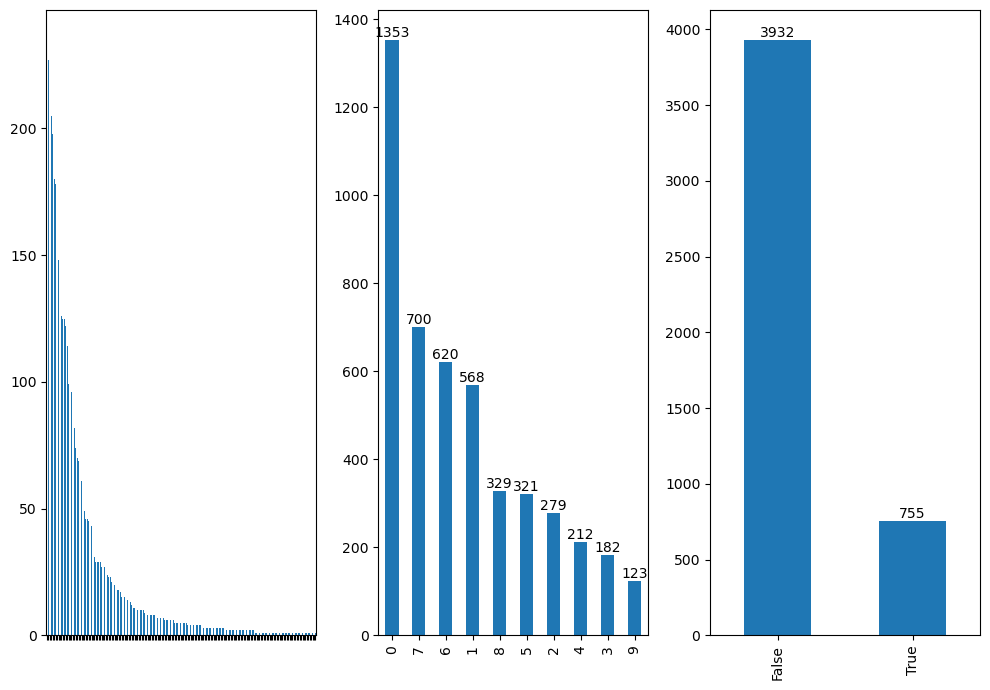

In [12]:
categories = ["Orbit ID", "Orbit Uncertainity", "Hazardous"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7))
for i, j in enumerate(categories):
    counts = df[j].value_counts()
    counts.plot(kind="bar", ax=axes[i])
    if len(counts) <= 10:
        for container in axes[i].containers:
            axes[i].bar_label(container)
    else:
        axes[i].set_xticklabels(())
plt.tight_layout()
plt.show()

In [13]:
numericals = []
for i in df.columns:
    if i not in categories+["Close Approach Date", "Orbiting Body", "Orbit Determination Date", "Equinox"]:
        numericals += [i]

# Numerical densities for hazardous and non-hazardous asteroids

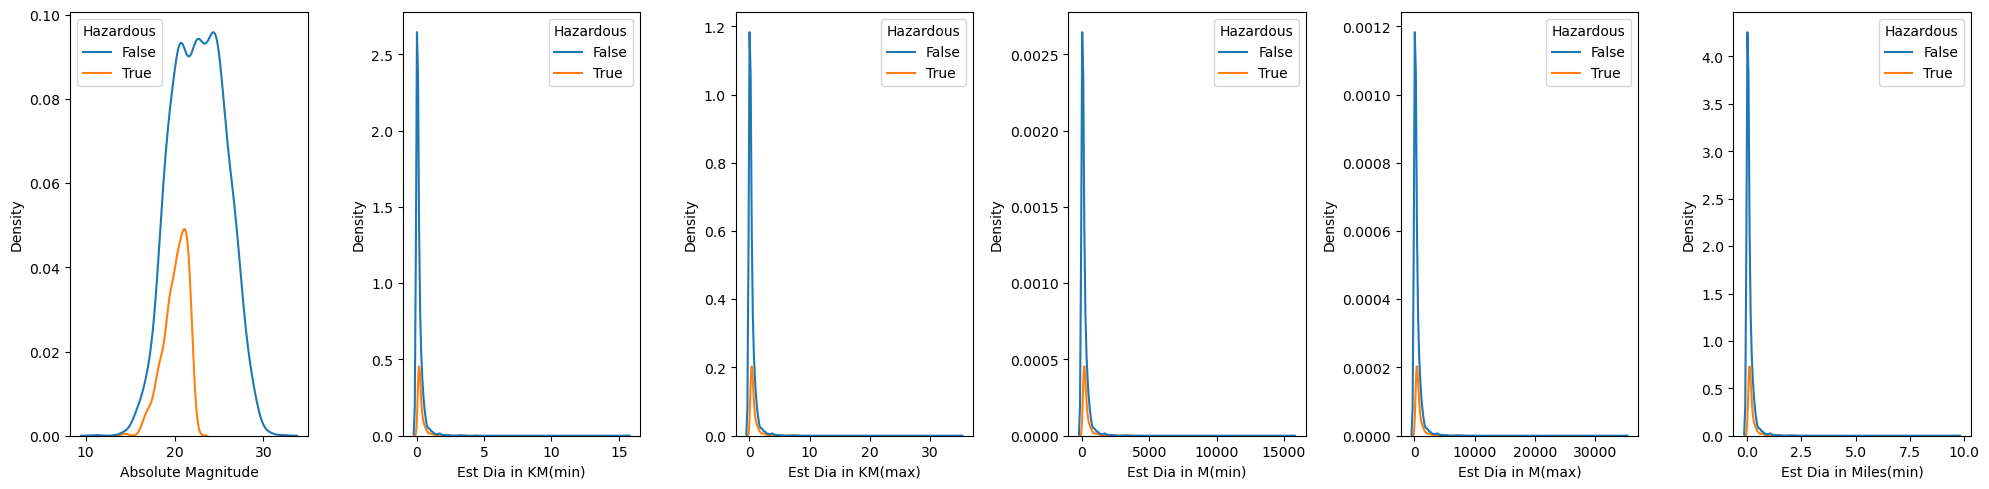

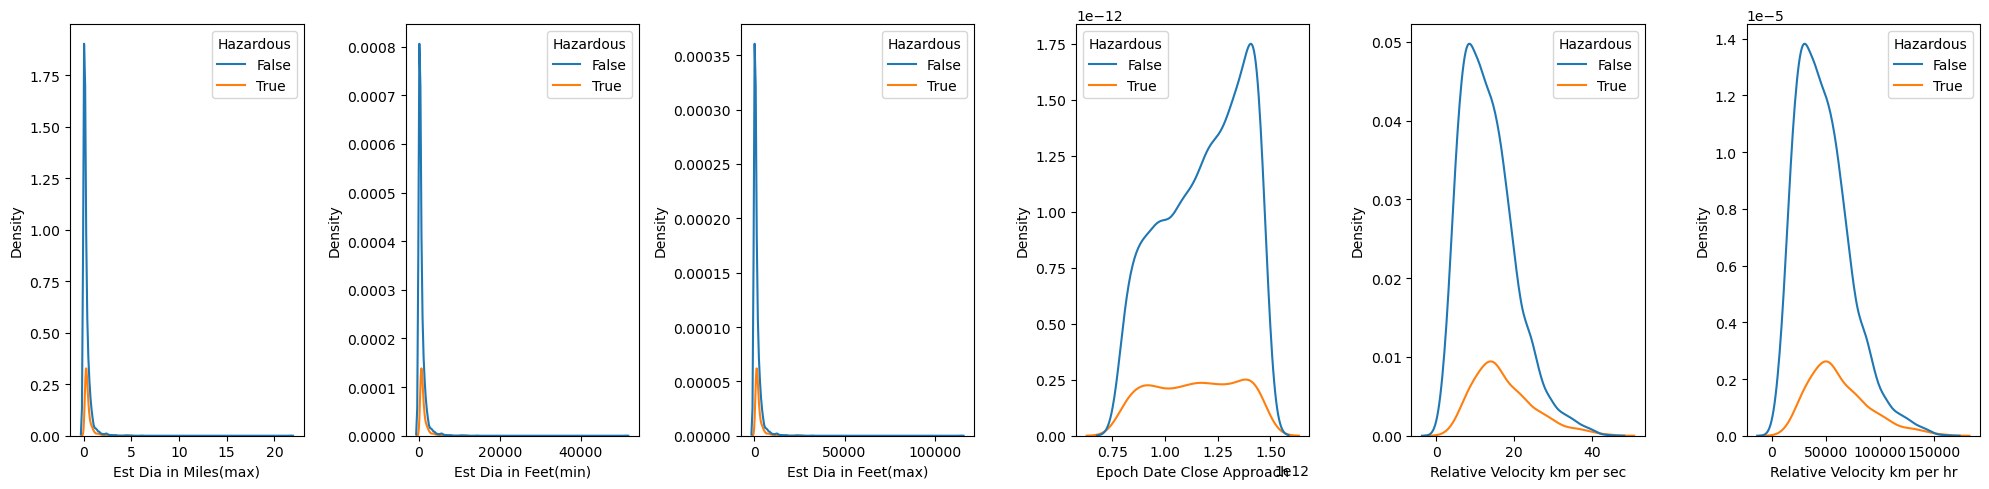

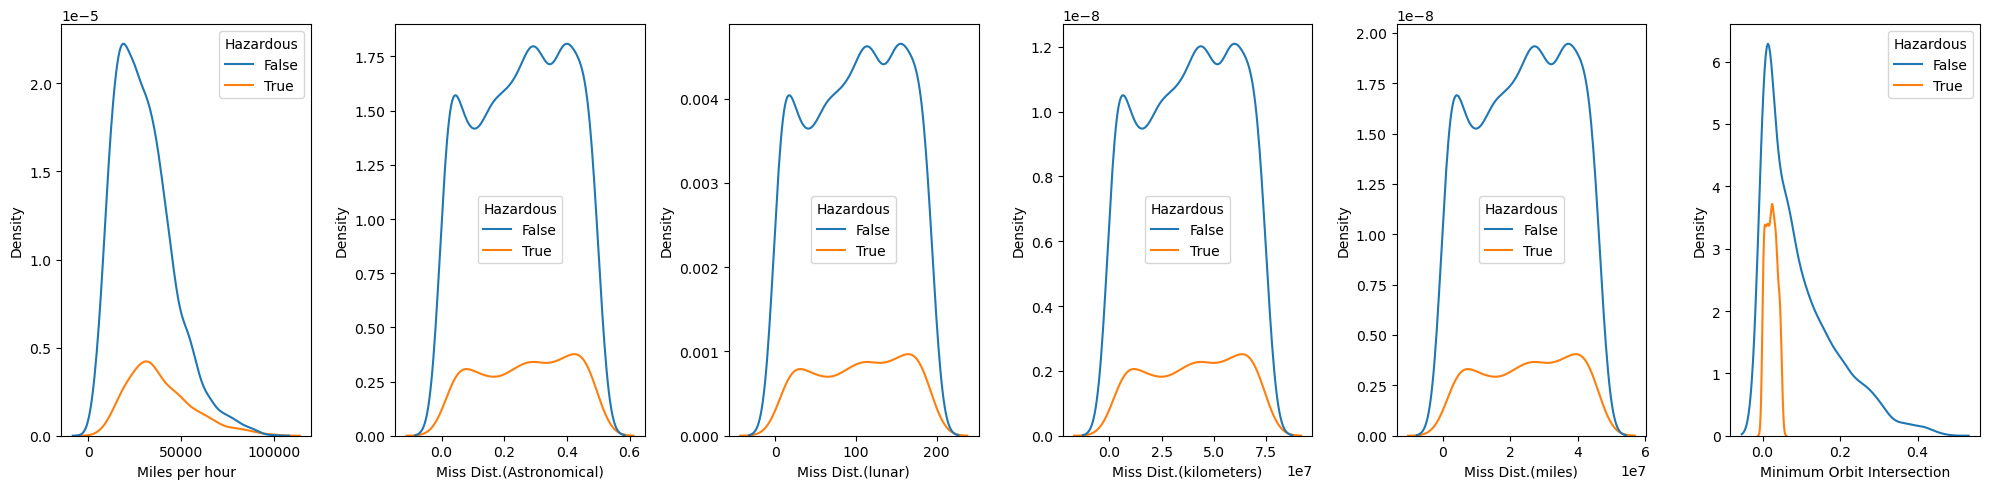

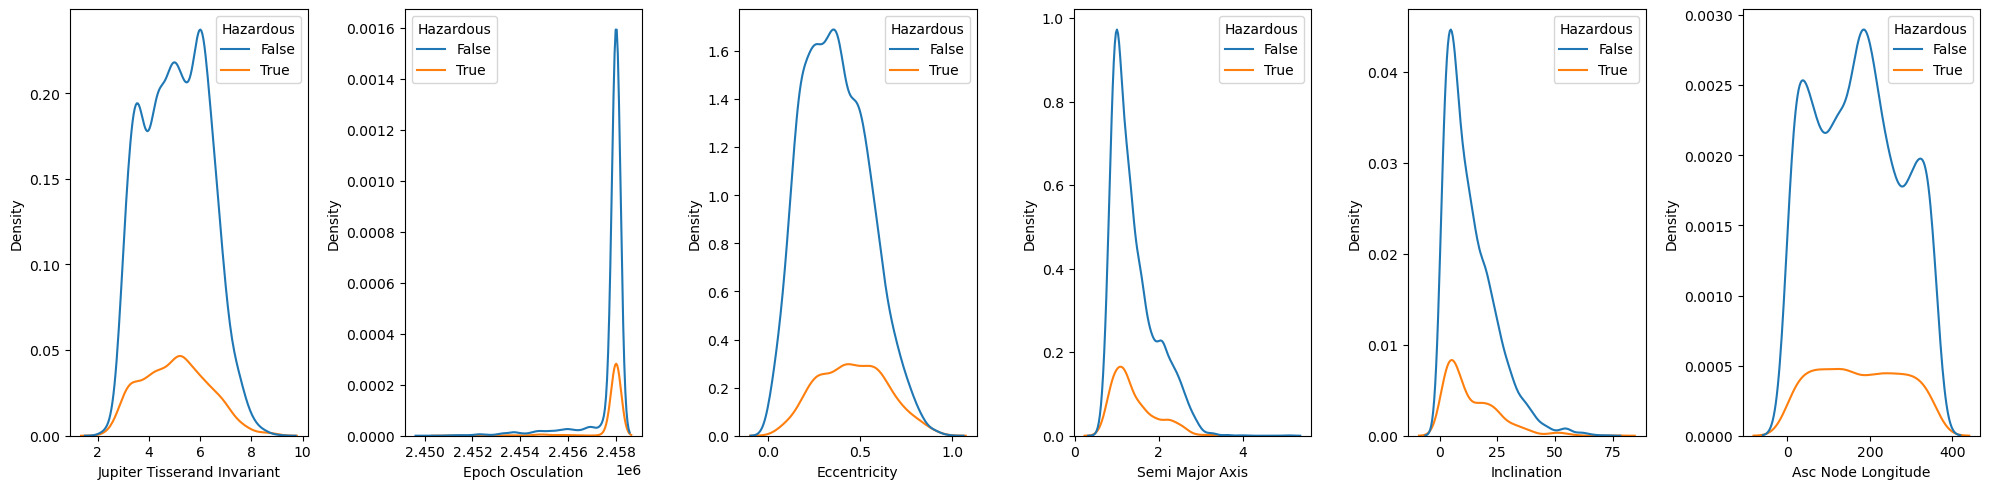

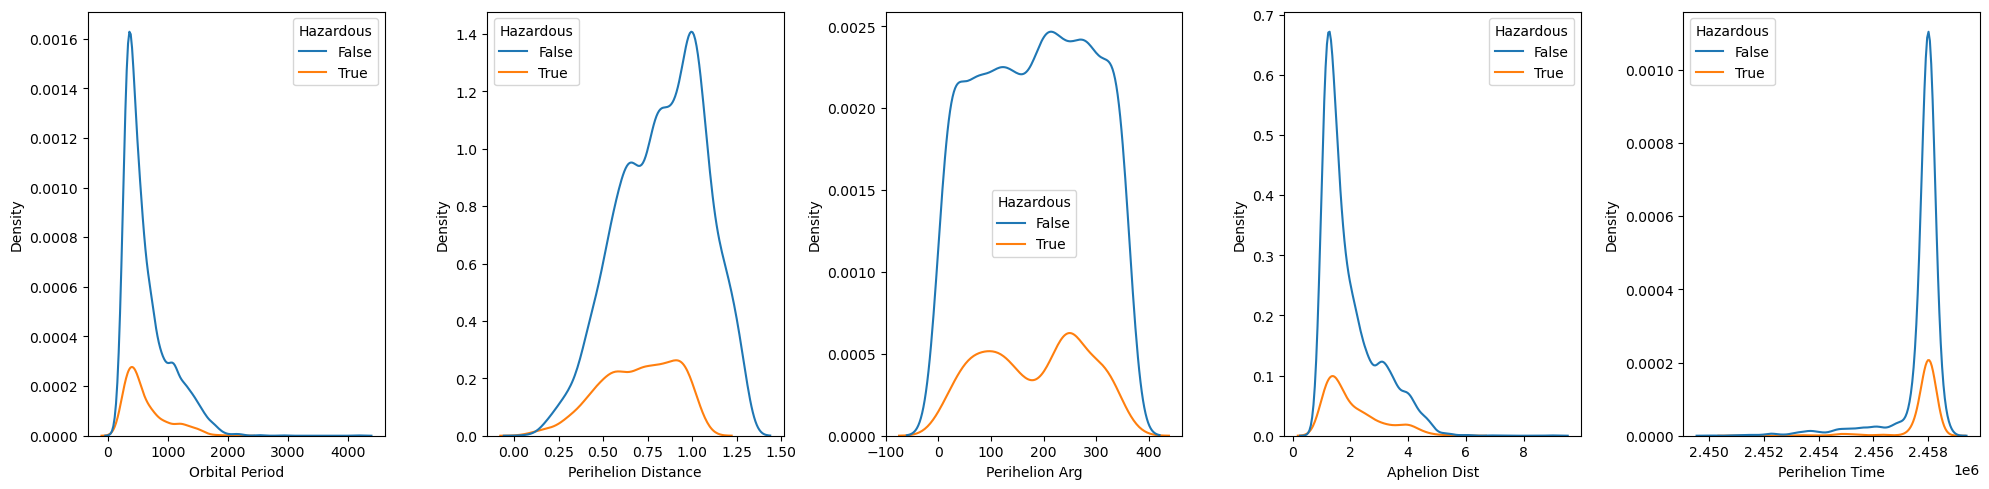

In [14]:
index = 0
for i in range(5):
    cols = 6
    if i == 4:
        cols -= 1
    fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20, 5))
    for j in range(cols):
        sns.kdeplot(df, x=numericals[index], hue=categories[-1], ax=axes[j])
        index += 1
    plt.tight_layout()
    plt.show()

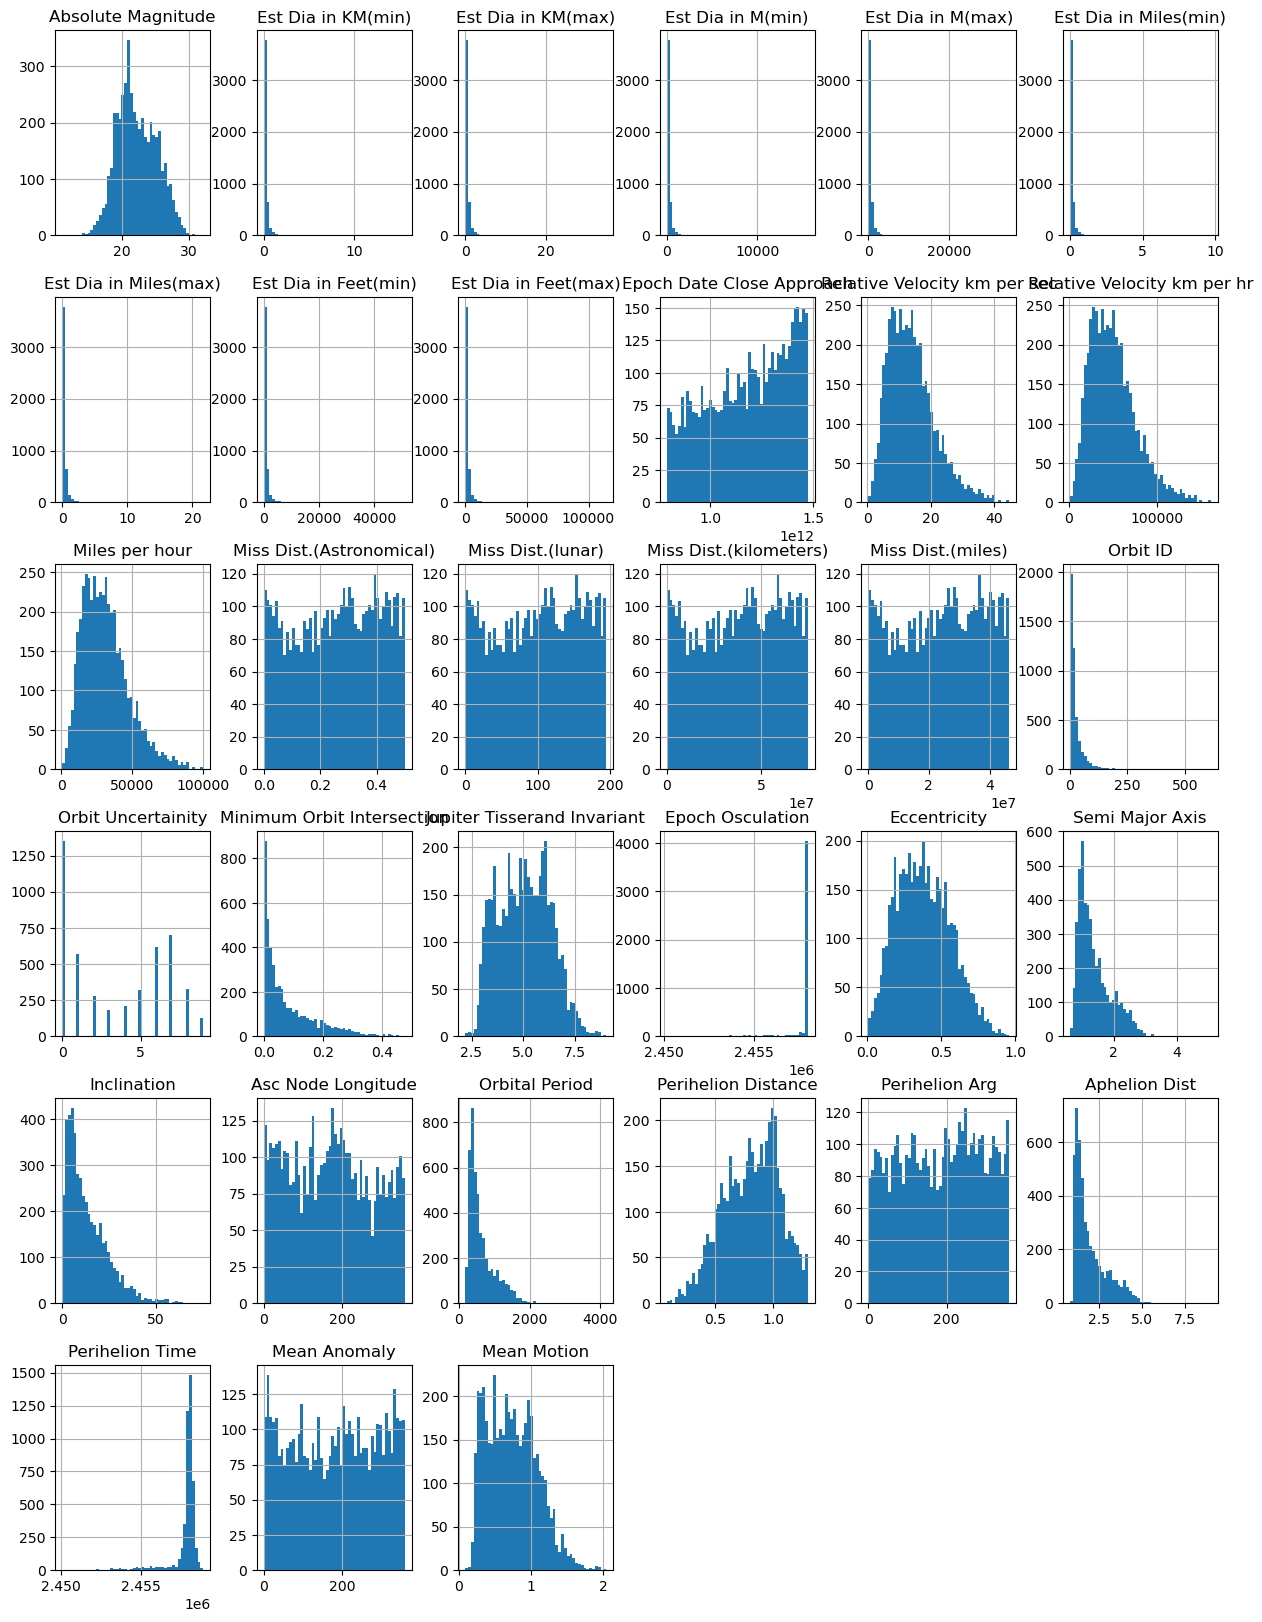

In [15]:
df.hist(bins = 50, figsize = (15, 20))
plt.show()

# Converting dates

In [16]:
def convert_time(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return [date.year, date.month, date.day]

In [17]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "November", "October", "December"]

In [18]:
df["Approach year"] = df["Close Approach Date"].apply(lambda x: convert_time(x)[0])
df["Approach month"] = df["Close Approach Date"].apply(lambda x: months[convert_time(x)[1]-1])
df["Approach day"] = df["Close Approach Date"].apply(lambda x: convert_time(x)[2])

In [19]:
df["Estimation year"] = df["Orbit Determination Date"].apply(lambda x: convert_time(x.split()[0])[0])
df["Estimation month"] = df["Orbit Determination Date"].apply(lambda x: months[convert_time(x.split()[0])[1]-1])
df["Estimation day"] = df["Orbit Determination Date"].apply(lambda x: convert_time(x.split()[0])[2])

# Count of years for estimated approach date and dates of orbit estimation

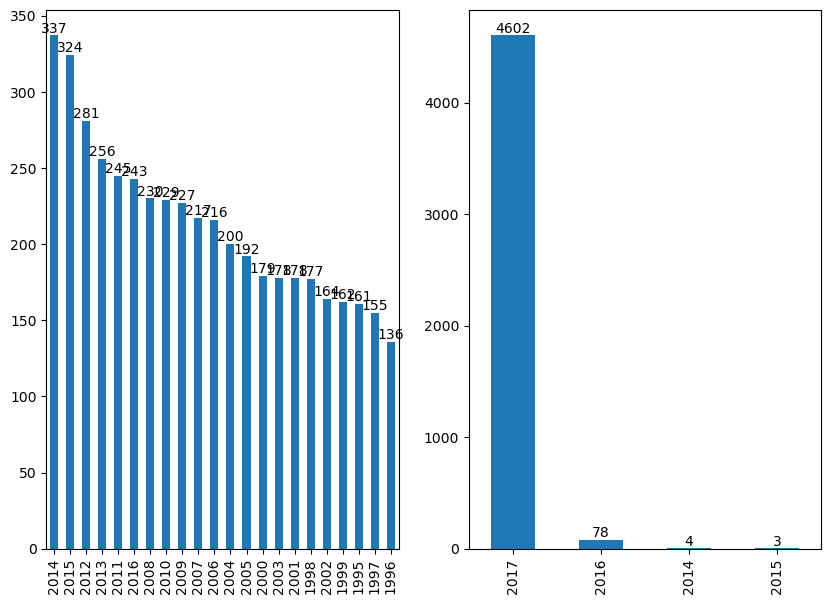

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
for i, j in enumerate(["Approach year", "Estimation year"]):
    df[j].value_counts().plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
plt.show()

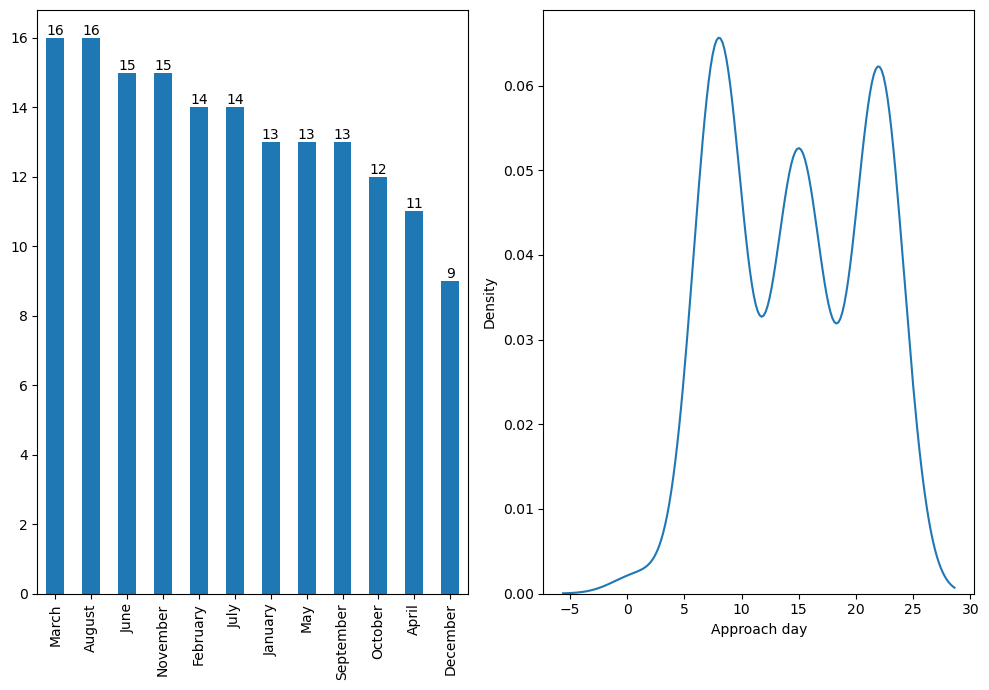

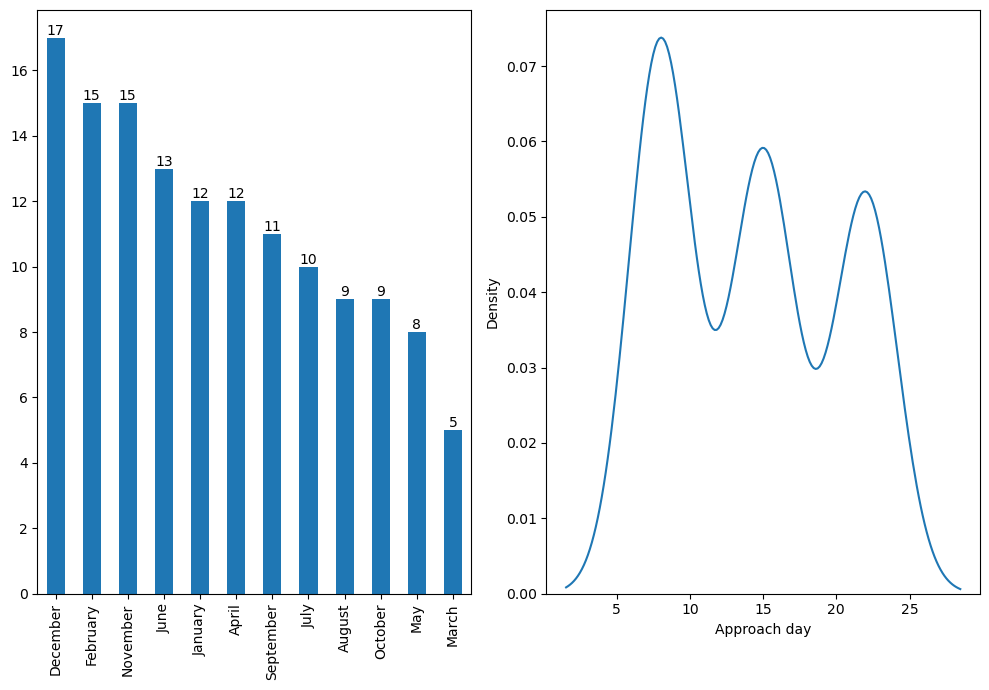

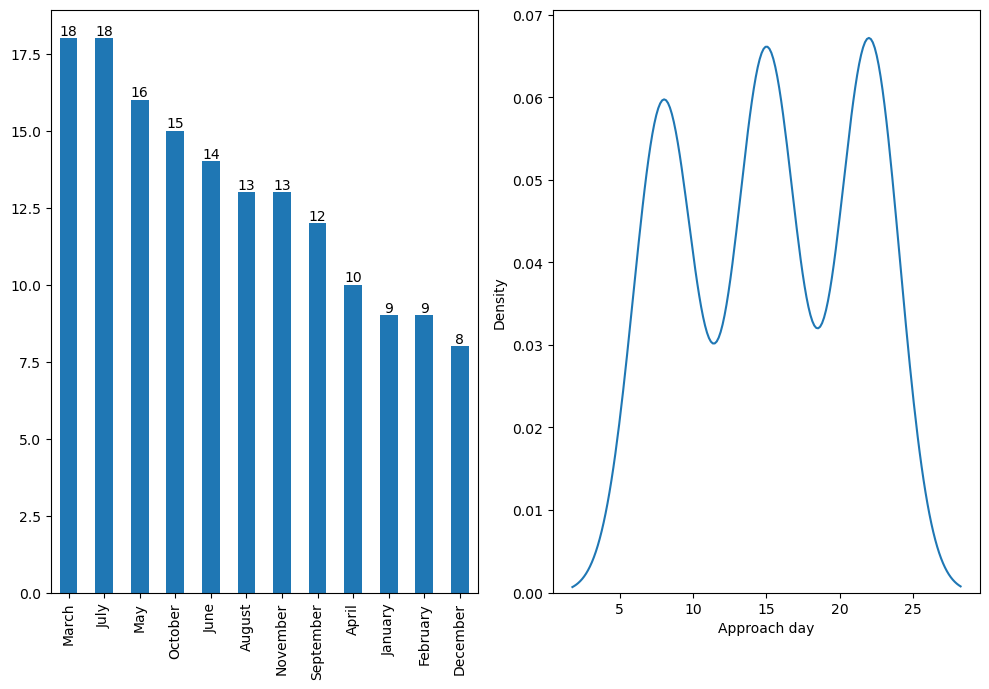

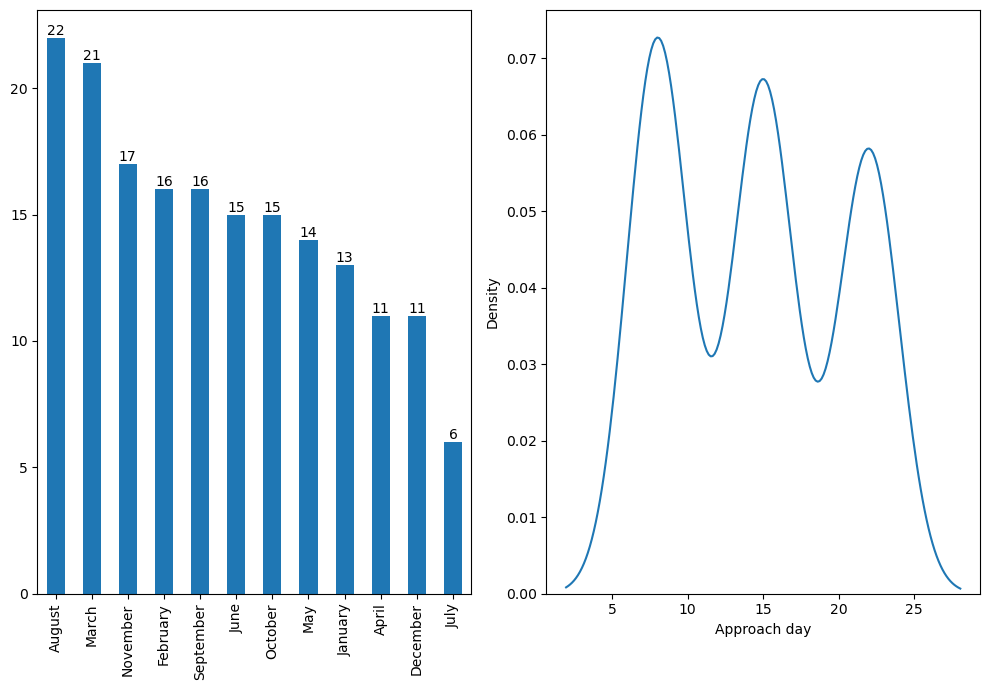

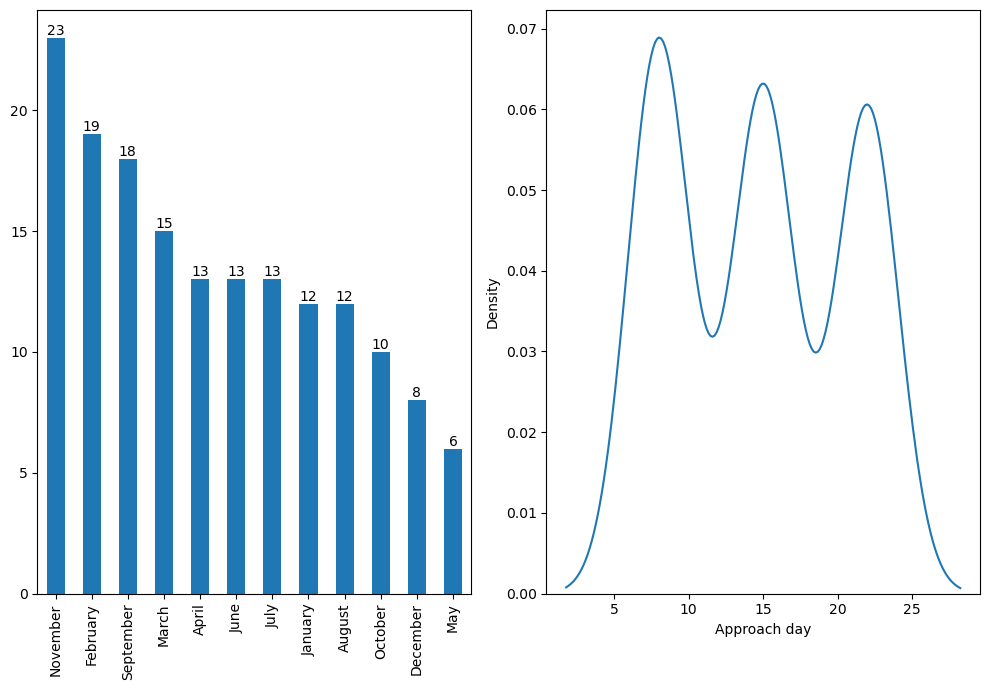

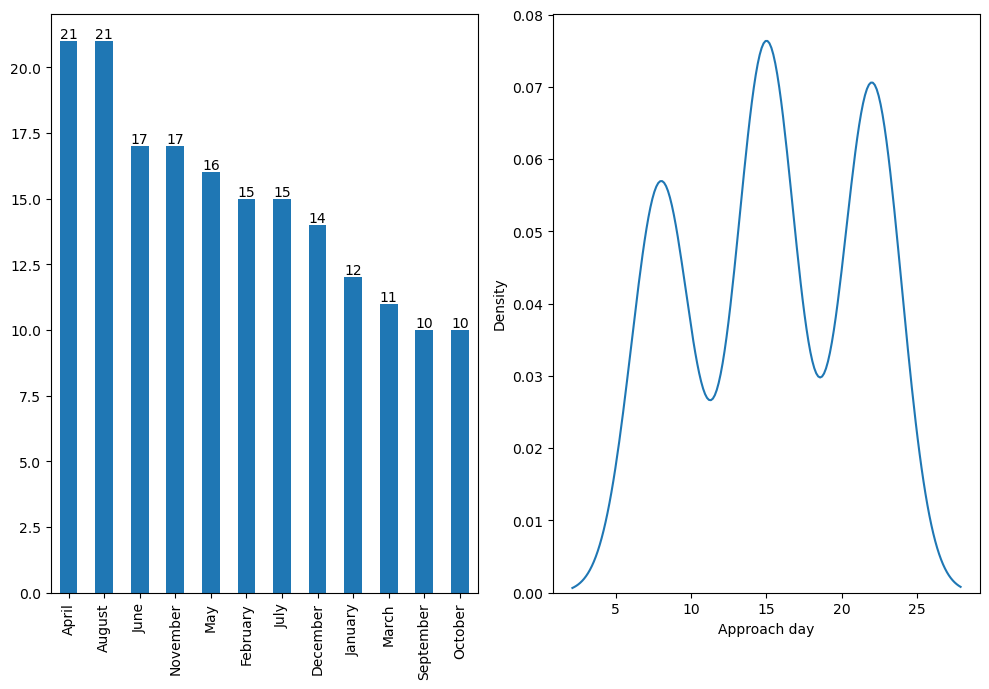

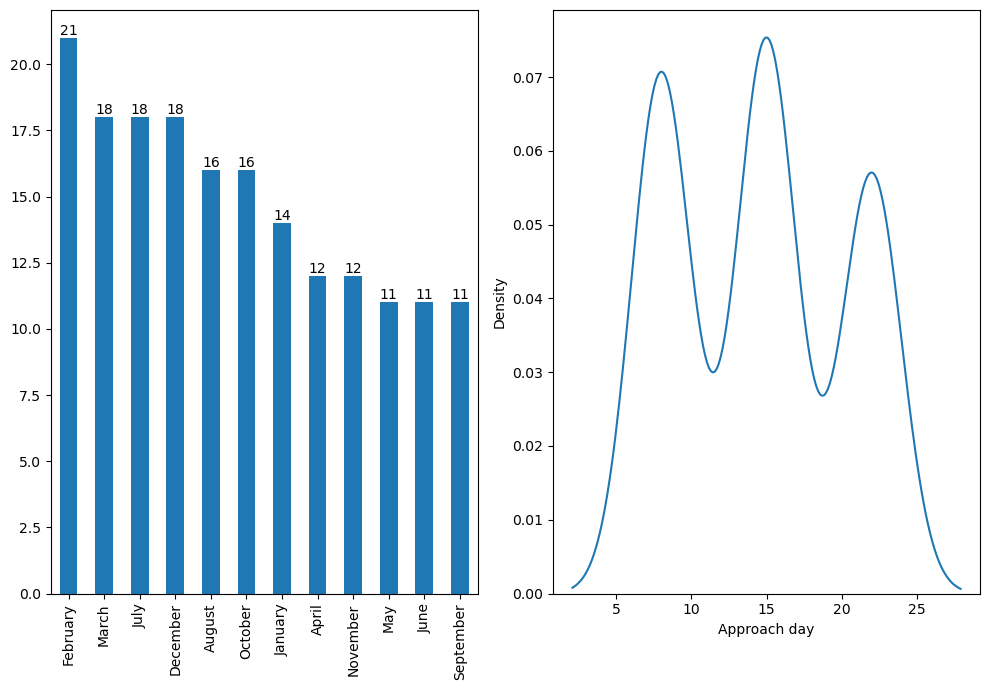

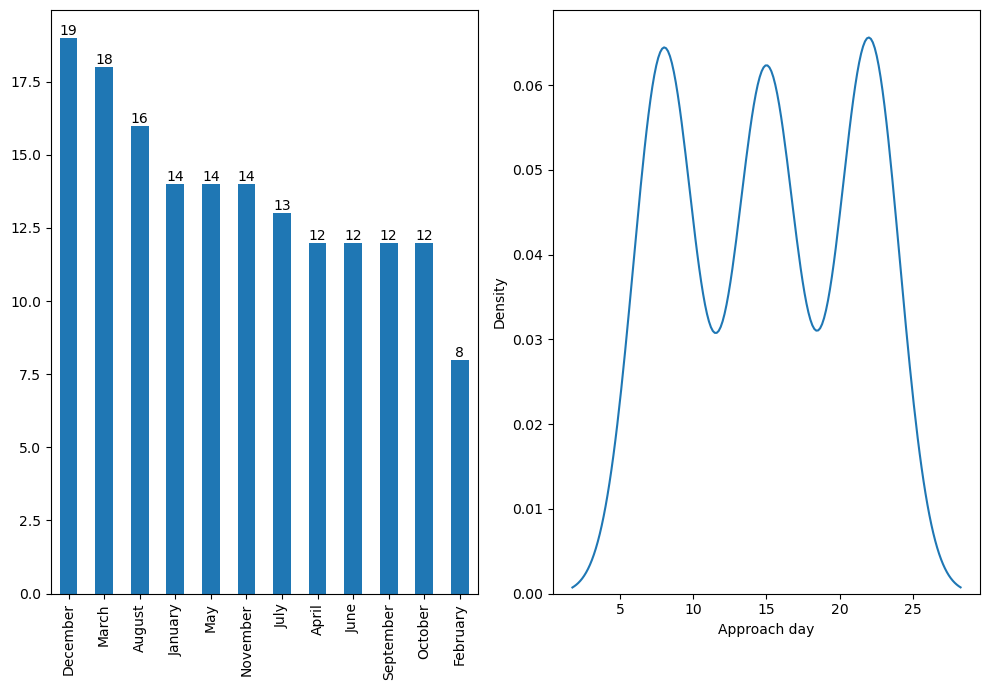

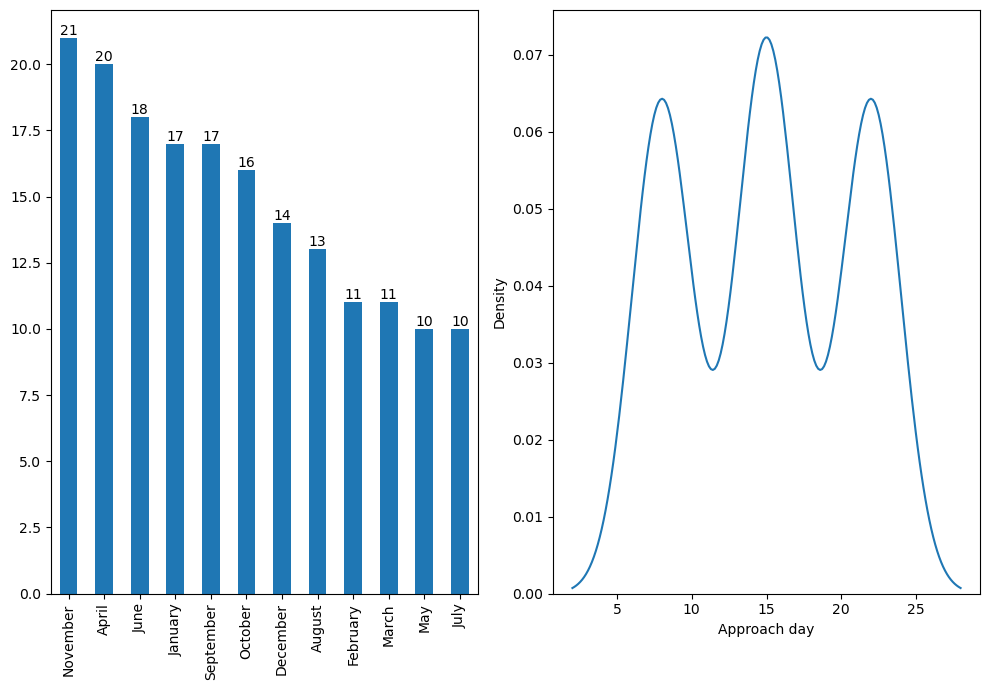

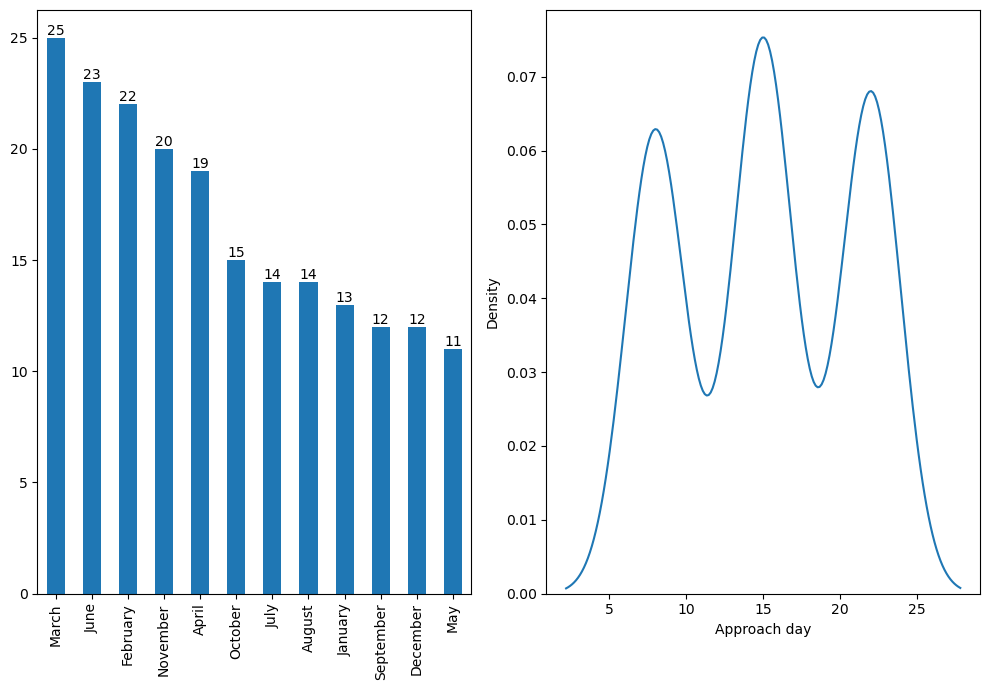

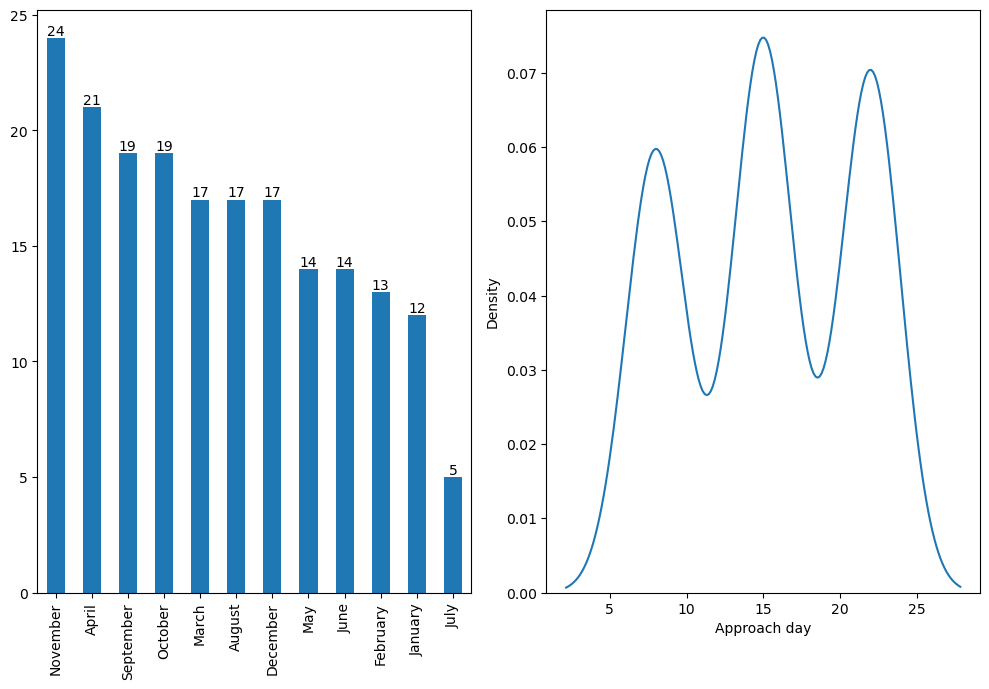

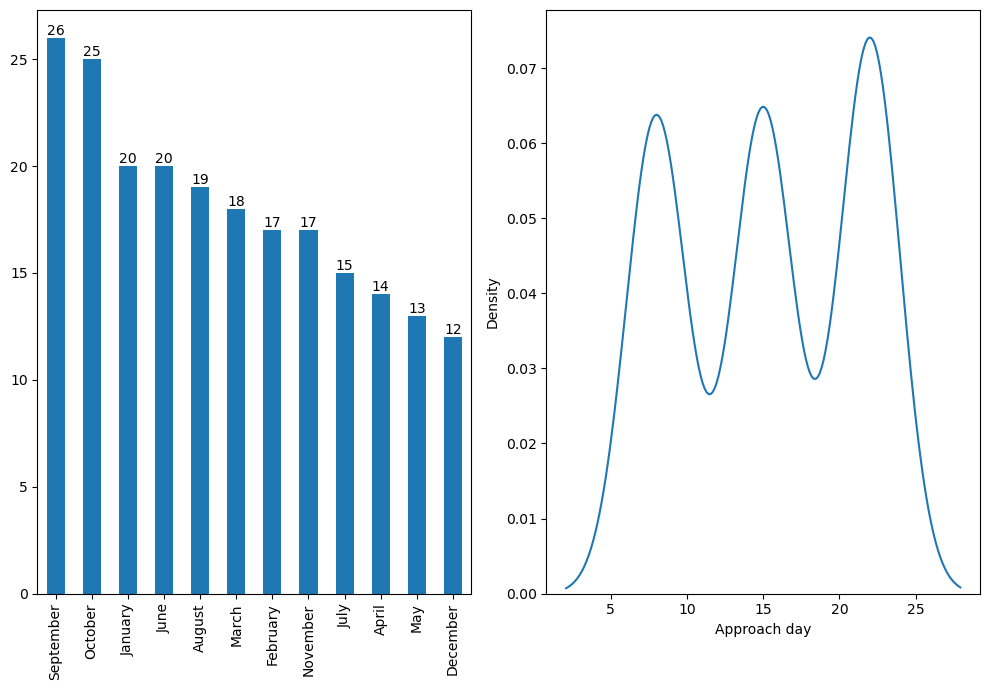

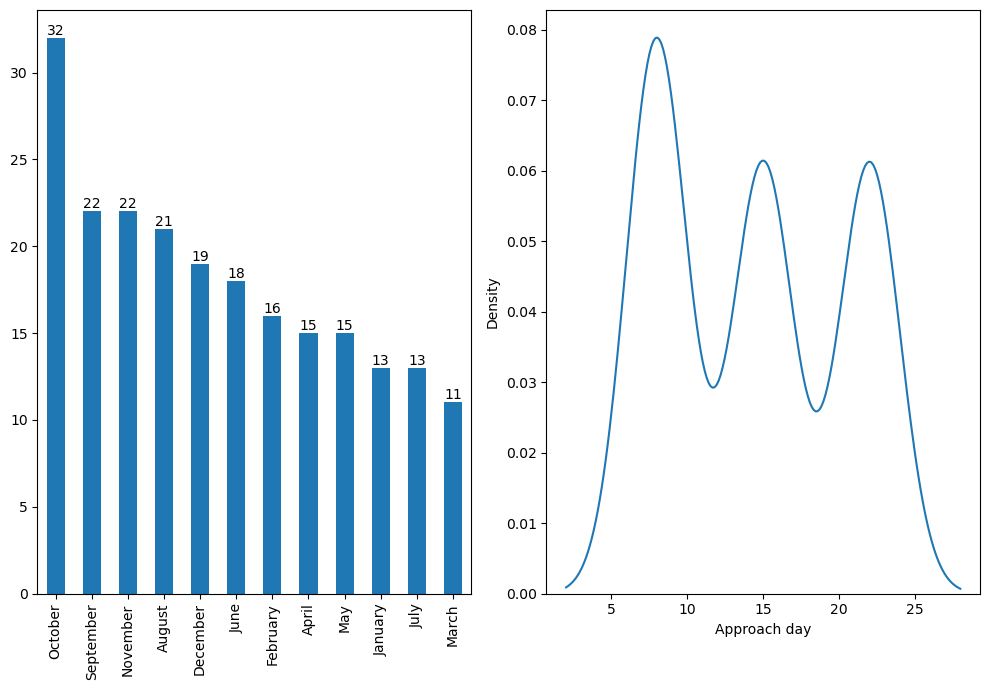

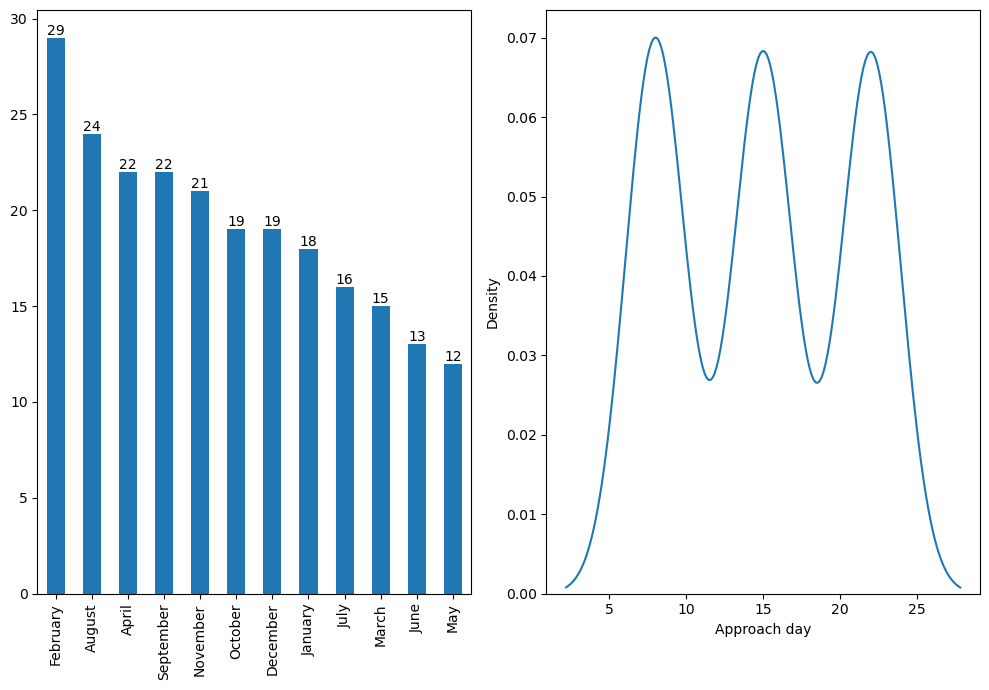

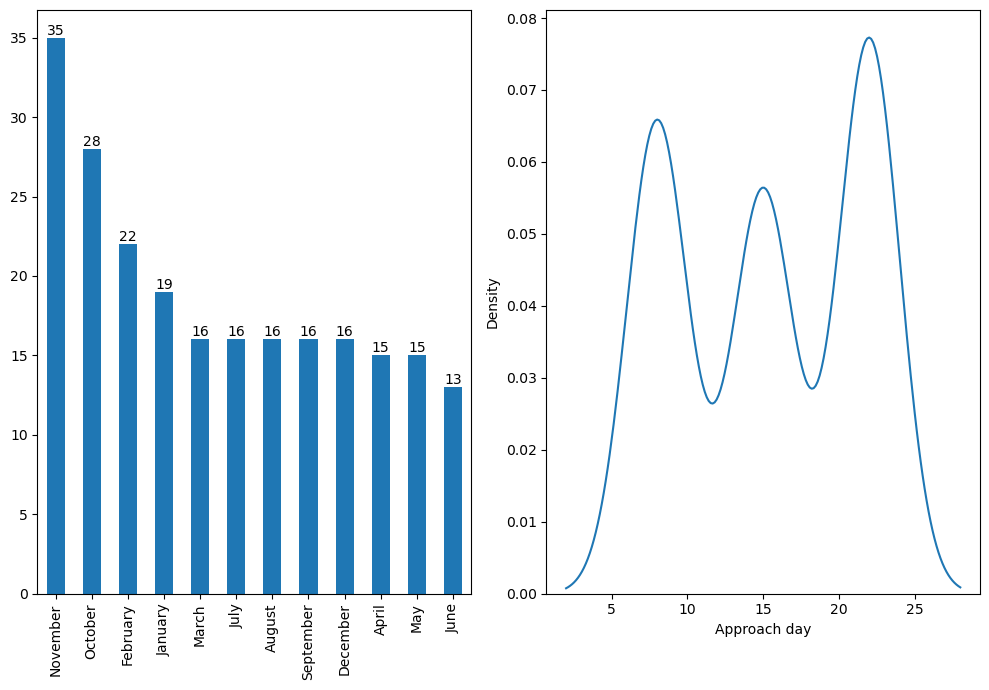

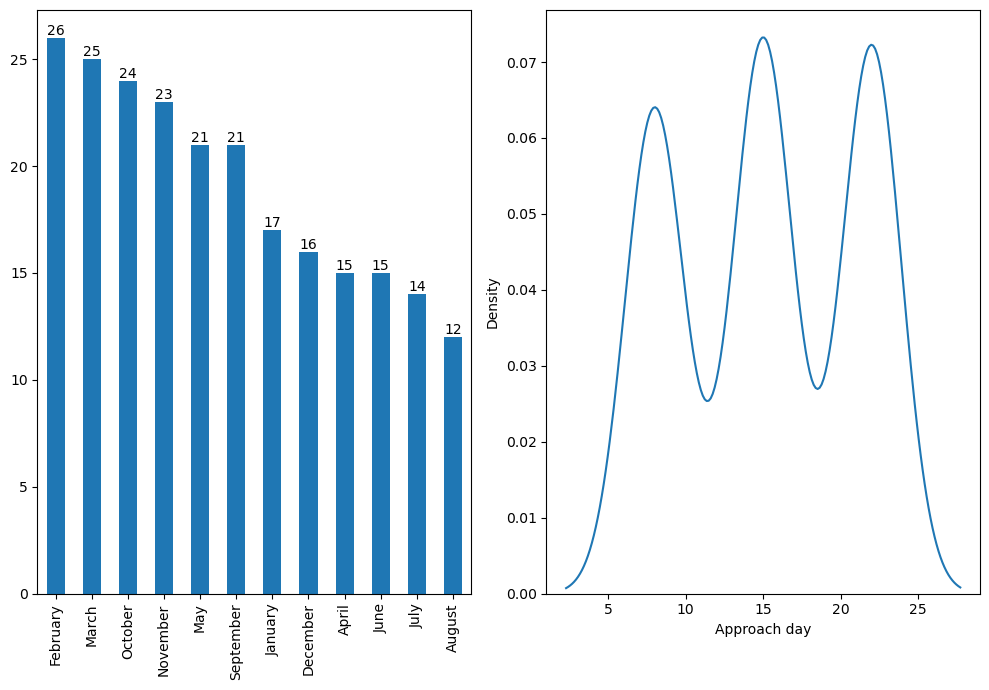

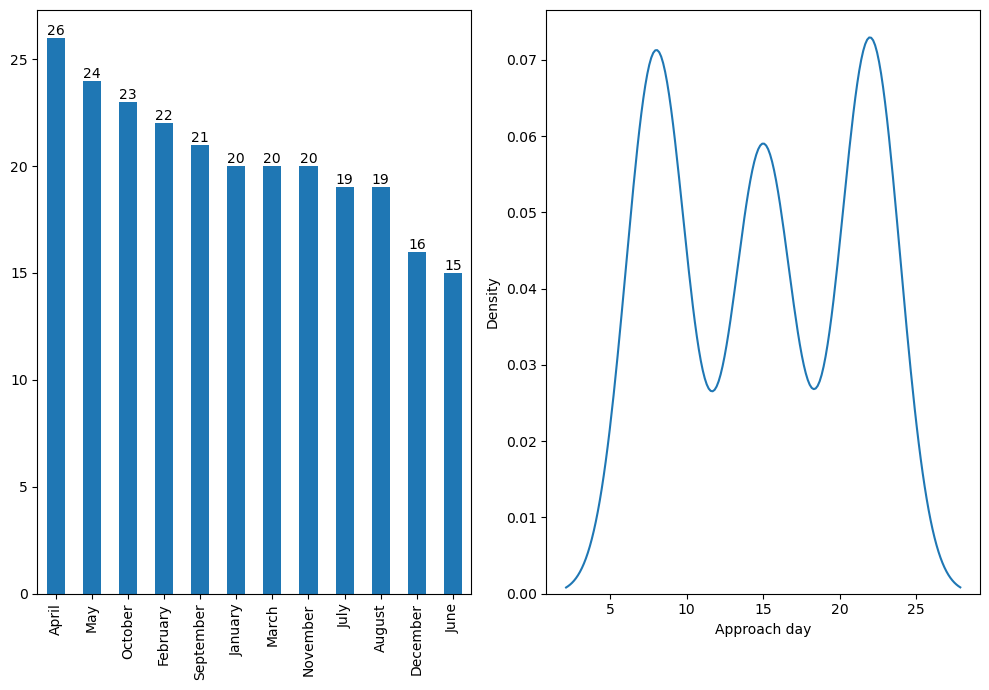

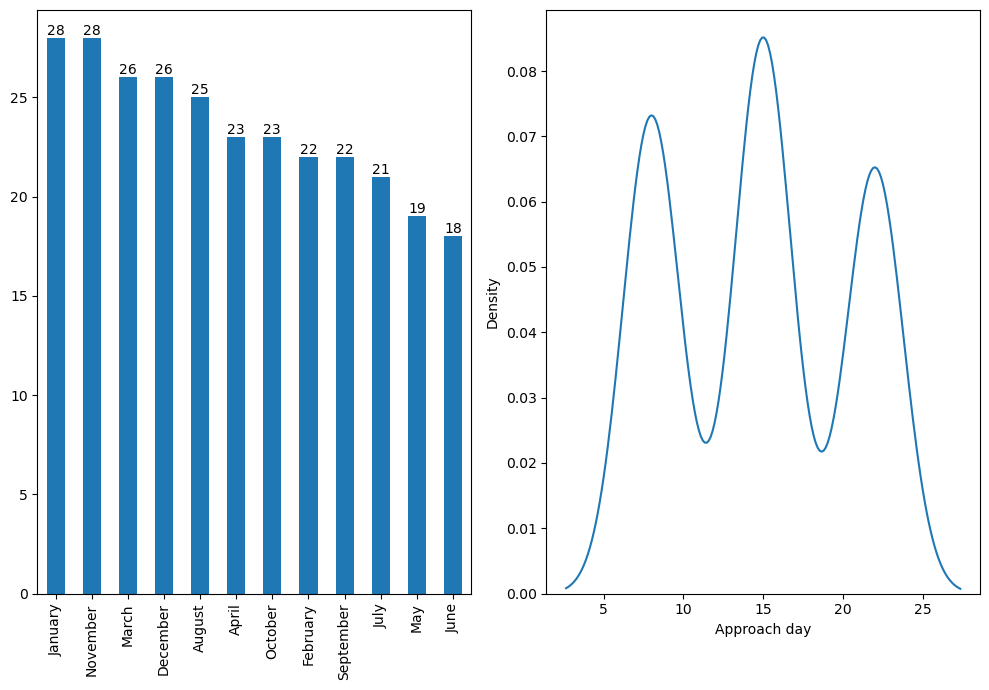

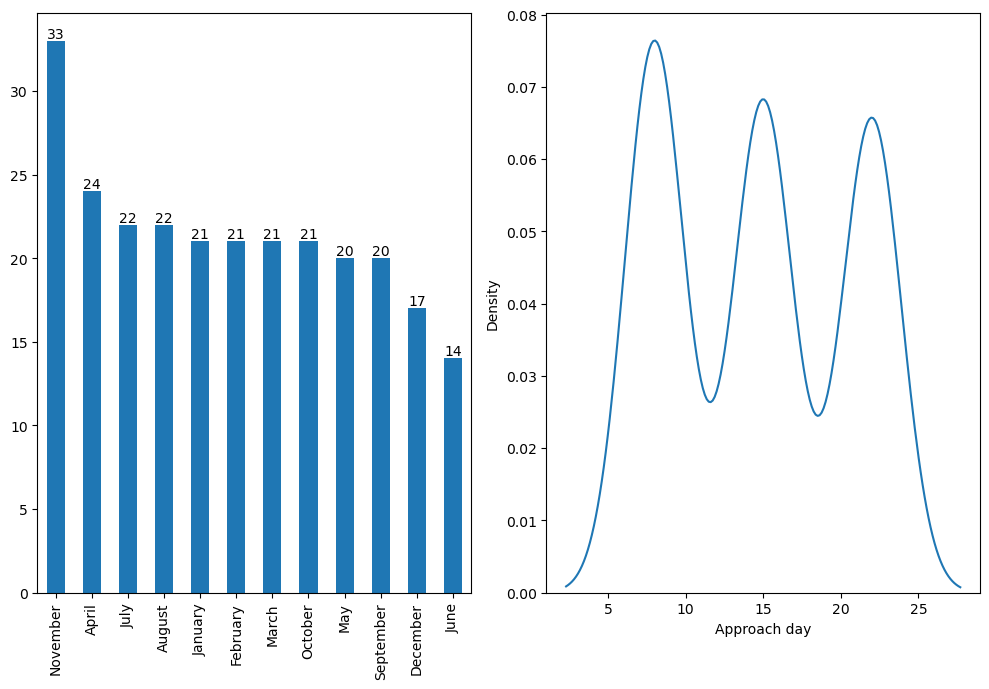

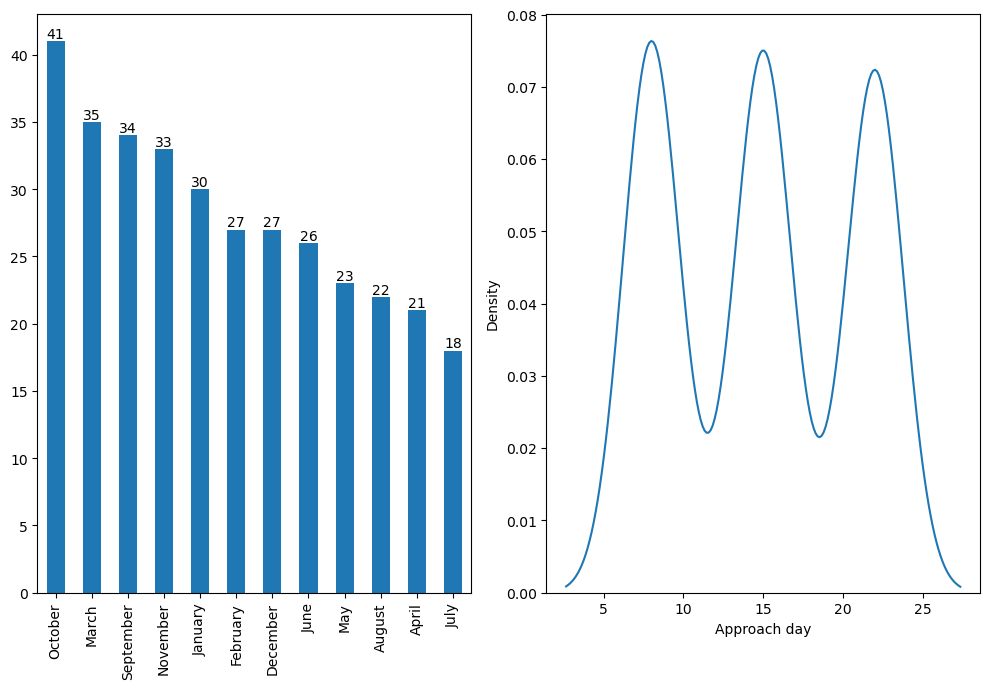

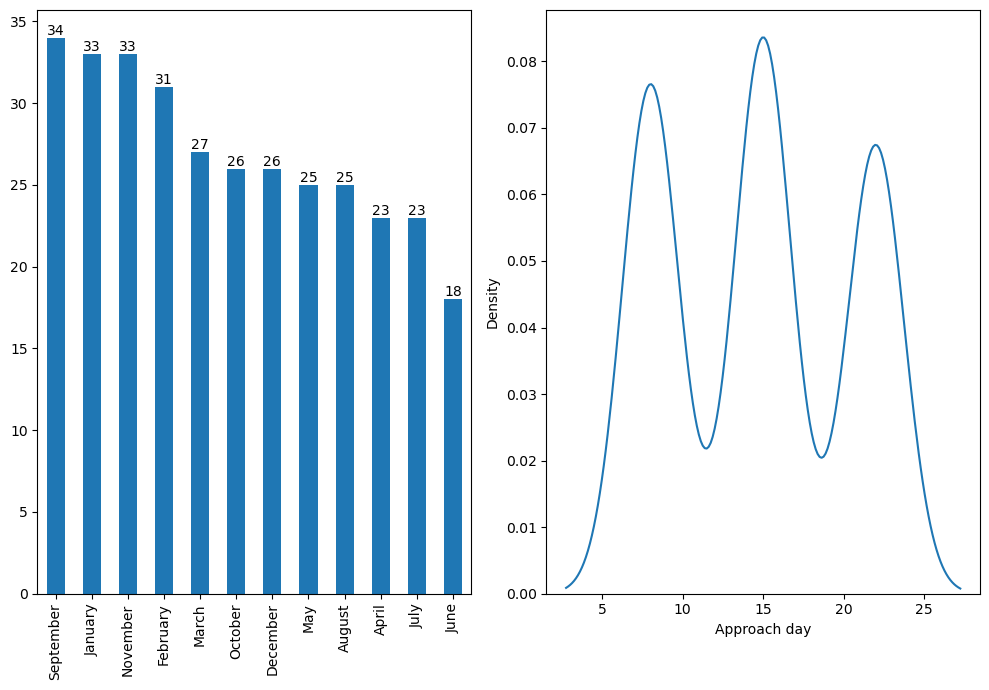

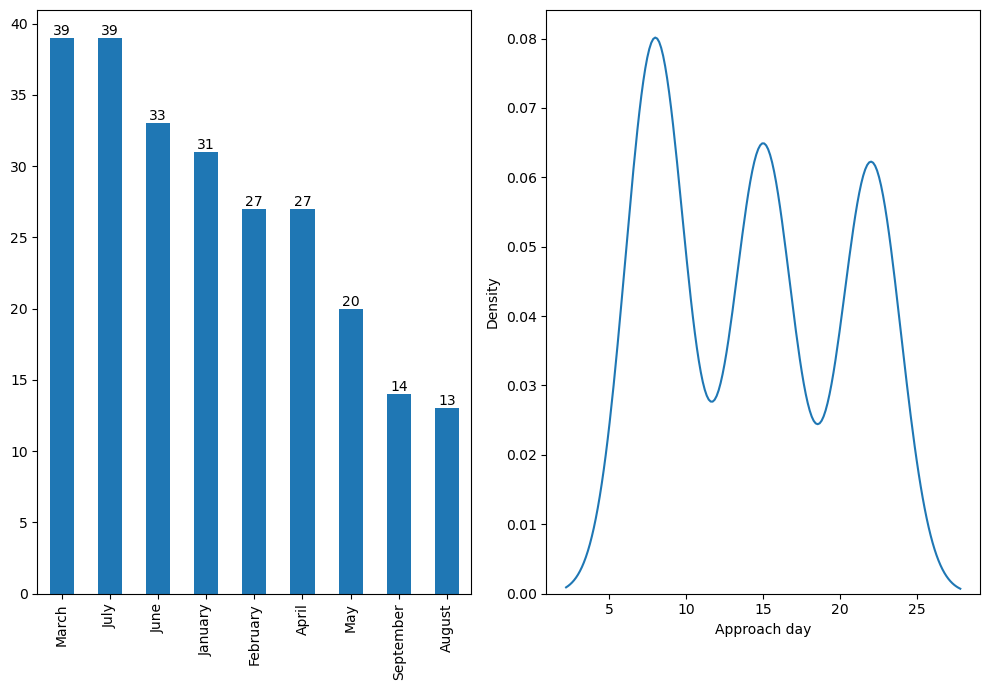

In [21]:
for i in df["Approach year"].unique():
    display(HTML('<h1>Approach months tendencies and days density for {} year</h1>'.format(i)))
    group = df[df["Approach year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
    group["Approach month"].value_counts().plot(kind="bar", ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    sns.kdeplot(group, x="Approach day", ax=axes[1])
    plt.tight_layout()
    plt.show()

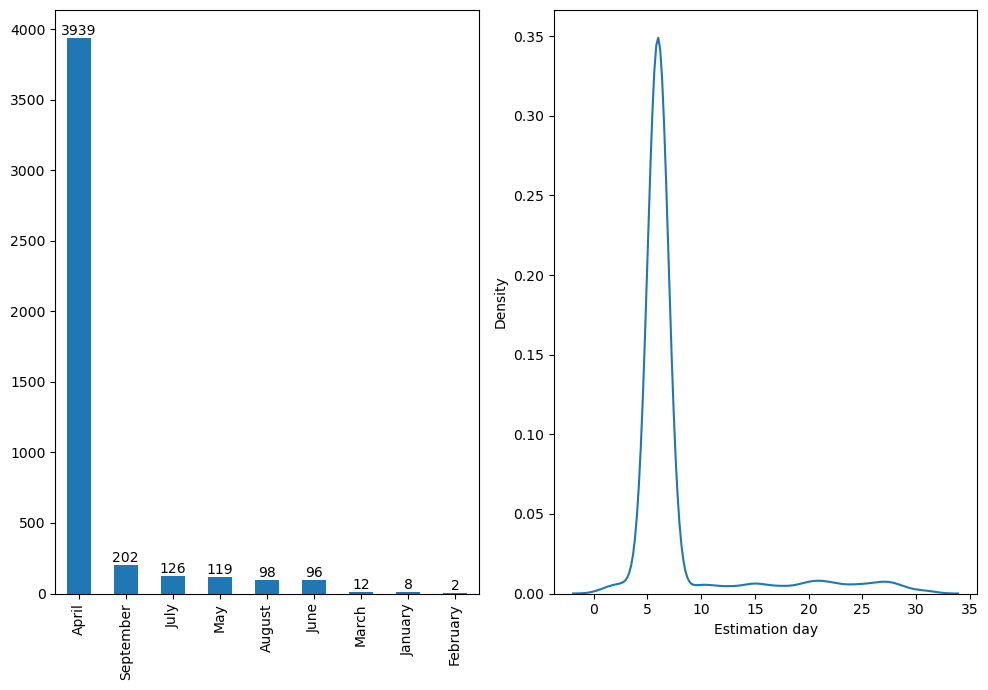

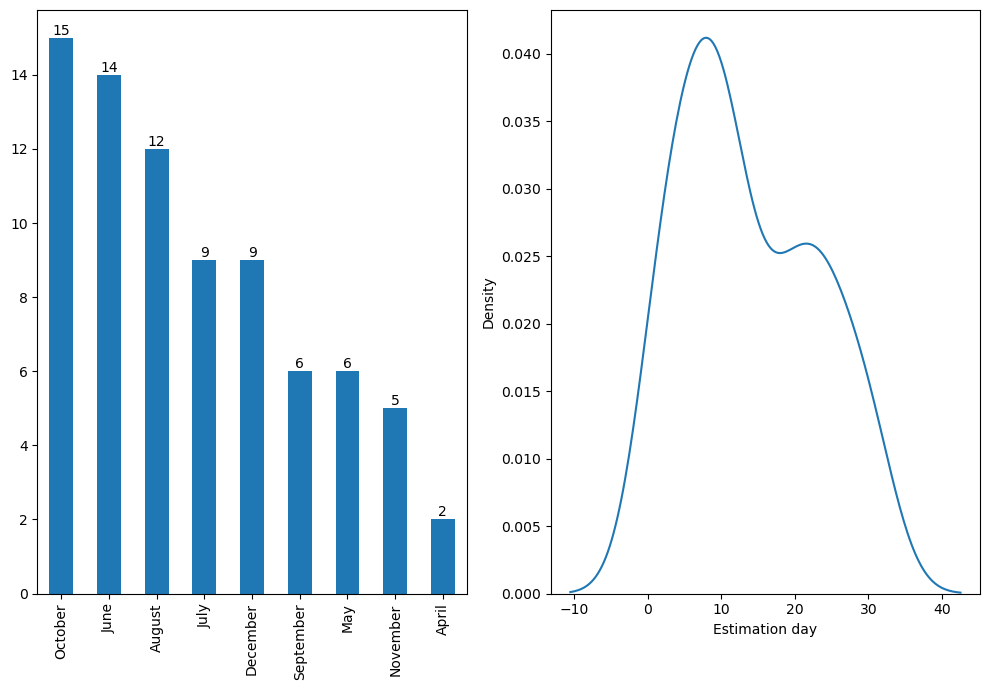

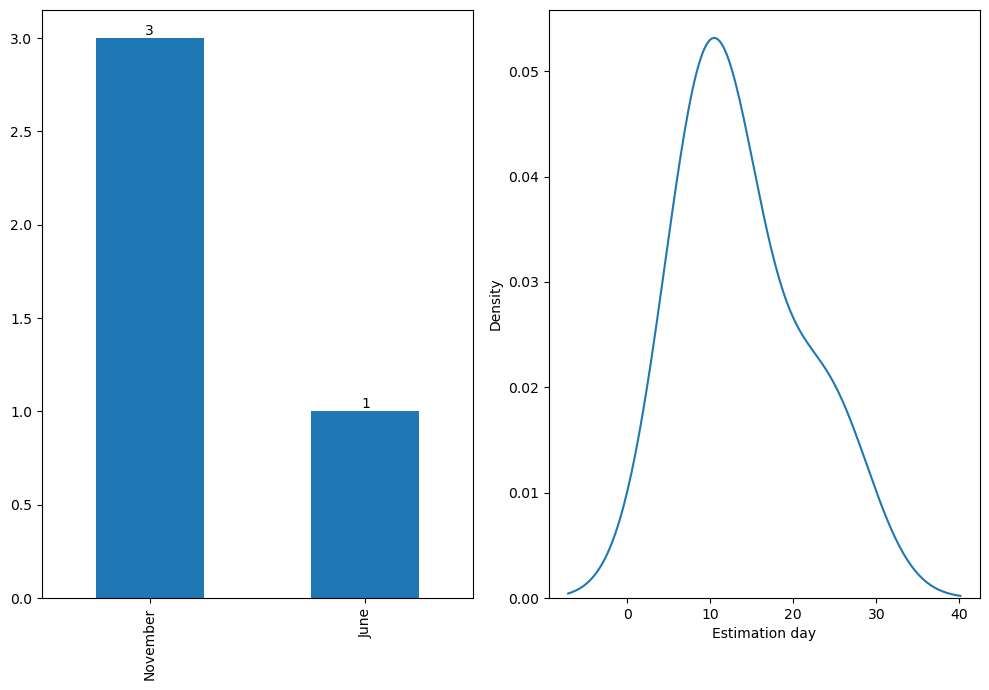

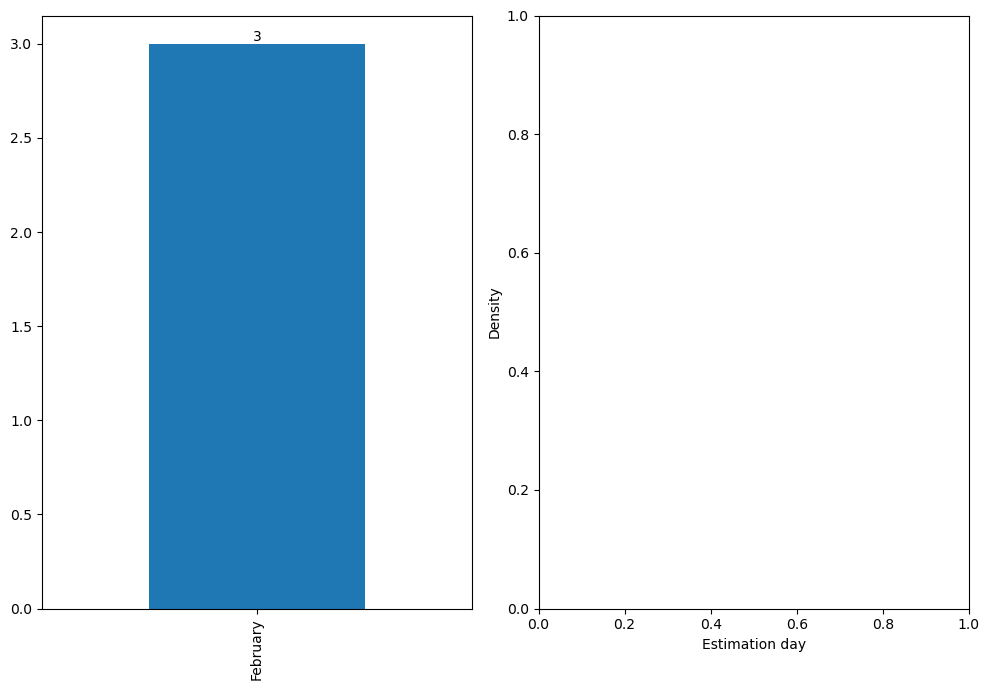

In [22]:
for i in df["Estimation year"].unique():
    display(HTML('<h1>Estimated orbit months tendencies and days density for {} year</h1>'.format(i)))
    group = df[df["Estimation year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
    group["Estimation month"].value_counts().plot(kind="bar", ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    sns.kdeplot(group, x="Estimation day", ax=axes[1])
    plt.tight_layout()
    plt.show()

# Encoding hazardous and non-hazardous asteroids

In [23]:
le = LabelEncoder()
df["Hazardous"] = le.fit_transform(df["Hazardous"])

# Scaling selected features

In [24]:
data = df[numericals+categories].values
x = data[:, :-1]
y = data[:, -1]

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Applying SMOTE to deal with bias and class imbalances

In [26]:
print("Before ", Counter(y_train))
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)
print("After: ", Counter(y_train.tolist()))

Before  Counter({0.0: 3141, 1.0: 608})
After:  Counter({0.0: 3141, 1.0: 3141})


# Feature importances - which feature affects whether asteroid is hazardous or not

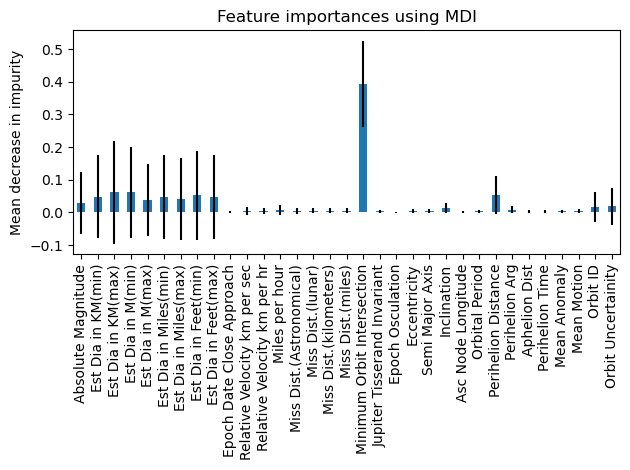

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=numericals+categories[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()

# Training and evaluation

In [28]:
def training(model, name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True)
    # axes.set_title("{}: {}%".format(name, round(score*100, 2)))
    return score*100, report

score:  77.50533049040513
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85       791
         1.0       0.40      0.82      0.53       147

    accuracy                           0.78       938
   macro avg       0.68      0.79      0.69       938
weighted avg       0.87      0.78      0.80       938



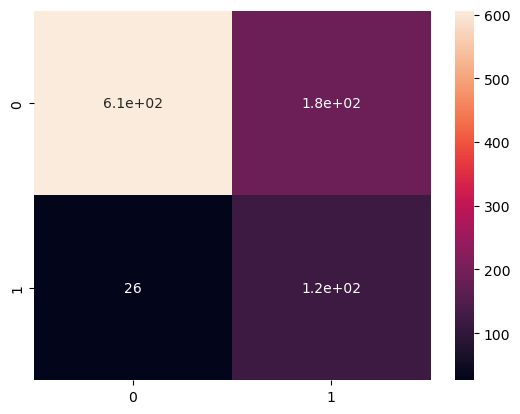

In [29]:
abc = KNeighborsClassifier()
score, report = training(abc, "KNeighborsClassifier")
print("score: ", score)
print(report)